<a href="https://colab.research.google.com/github/foxtrotmike/musings/blob/main/permutation_test_quartiles_dependency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observed Statistic: 100
P-value: 0.0


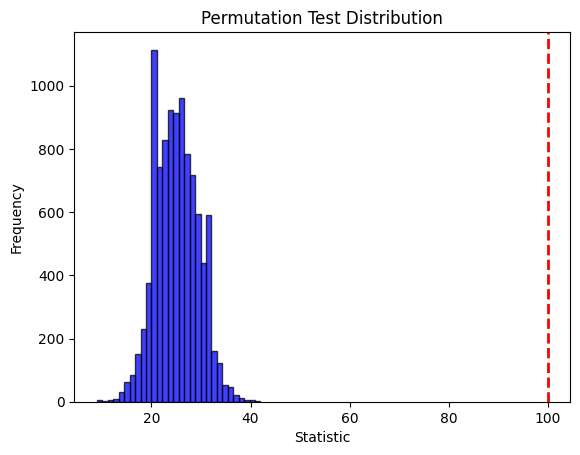

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
np.random.seed(42)
n_patients = 100
m_A = np.random.rand(n_patients)
m_B = np.log10(m_A)#np.random.rand(n_patients) # generating data with a dependency between the two
percentiles_A = pd.qcut(m_A, 4, labels=["Q1", "Q2", "Q3", "Q4"])
percentiles_B = pd.qcut(m_B, 4, labels=["Q1", "Q2", "Q3", "Q4"])

# Function to calculate the observed statistic
def observed_statistic(percentiles_A, percentiles_B):
    count = sum(percentiles_A == percentiles_B)
    return count

# Calculate the observed statistic
obs_stat = observed_statistic(percentiles_A, percentiles_B)

# Perform permutation test
n_permutations = 10000
perm_stats = []

for _ in range(n_permutations):
    permuted_B = np.random.permutation(percentiles_B)
    perm_stat = observed_statistic(percentiles_A, permuted_B)
    perm_stats.append(perm_stat)

# Calculate p-value
perm_stats = np.array(perm_stats)
p_value_r = np.sum(perm_stats >= obs_stat) / n_permutations
p_value_l = np.sum(perm_stats <= obs_stat) / n_permutations
p_value = 2*np.min((p_value_r,p_value_l))
# Display results
print(f"Observed Statistic: {obs_stat}")
print(f"P-value: {p_value}")

# Plot permutation distribution
plt.hist(perm_stats, bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(obs_stat, color='red', linestyle='dashed', linewidth=2)
plt.title('Permutation Test Distribution')
plt.xlabel('Statistic')
plt.ylabel('Frequency')
plt.show()


In [3]:
percentiles_A

['Q2', 'Q4', 'Q4', 'Q3', 'Q1', ..., 'Q3', 'Q3', 'Q2', 'Q1', 'Q1']
Length: 100
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']